# Laboratorio 1 Inteligencia de negocios - Regresión Lineal#

Grupo 17 - Miembros:


*   Juan Esteban Diaz Castro - 202121646
*   Jose Botello - 20
*   Samuel Ramirez - 202123423



In [2]:
%pip install numpy
%pip install pandas
%pip install joblib
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install scipy
%pip install jupyter

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Samuel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Samuel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Samuel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Collecting matplotlib
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.0 MB 6.7 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/8.0 MB 6.9 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.0 MB 6.8 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/8.0 MB 7.2 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.0 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 7.0 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------------------------------- ------ 1.8/2.2 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 7.8 M


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Samuel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Samuel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Samuel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Samuel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.7 MB 9.1 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.7 MB 12.1 MB/s eta 0:00:01
   -------------------------------- ------- 9.4/11.7 MB 15.4 MB/s eta 0:00:01
   ---------------------------------------- 11.7/11.7 MB 15.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.2 MB ? eta -:--:--
   ----------------------- ---------------- 7.6/13.2 MB 36.2 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.2 MB 37.3 MB/s eta 0:00:01
   ---------------------------------------- 13.2/13.2 MB 30.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 16.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   ---------------------------------------  10.0/10.2 MB 47.8 MB/s eta 0:00:01
   --------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Samuel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

import scipy.stats as stats

      

# 1. Carga de los Datos

In [58]:

data = "./data/202510_Laboratorio 1 - Regresión_train_data.csv"

star = pd.read_csv(data, sep=",", encoding="ISO-8859-1")

star_alpes = star.copy()

star_alpes.shape


(4000, 18)

In [ ]:
star_alpes.sample(5)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
1556,1237648720160555035,188.111567,-0.899131,17.22348,15.61154,15.03329,14.82865,14.72664,756,1,483,0.857218,0,STAR,0.000084,54567,-0.001869,0.002611
2129,1237648721787158648,224.714228,0.385424,19.08576,17.97626,17.87397,17.88168,17.98162,756,4,727,0.858901,1,STAR,-0.000441,54970,0.001640,-0.000556
192,1237648705129283785,218.359966,0.506998,18.66003,17.66792,17.15151,16.69630,16.52570,752,5,500,0.890676,1,GALAXY,0.078196,51637,0.086376,-0.045735
1009,1237648703511003433,200.954928,-0.723213,18.92616,17.56431,16.88419,16.51289,16.21638,752,2,383,0.876329,0,GALAXY,0.075614,51984,-0.004043,0.001389
100,1237648720683335776,155.905758,-0.456405,19.40532,17.89528,17.04847,16.59534,16.33259,756,2,268,0.863869,0,GALAXY,0.160229,51941,-0.005418,-0.007146


In [59]:
star_alpes.dtypes

objid         int64
ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
run           int64
camcol        int64
field         int64
score       float64
clean         int64
class        object
redshift    float64
mjd           int64
rowv        float64
colv        float64
dtype: object

Vamos a separar los datos de entrenamiento del modelo y los que usaremos para la evaluación del modelo, en este paso utilizamos la columna 'redshift' para tener nuestra variable y a lo largo del modelo ya que nos interesa predecir el redshift para futuras lecturas que ingresan.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(star_alpes, star_alpes["redshift"], test_size=0.3, random_state=1)

X_train.shape, y_train.shape

((2800, 18), (2800,))

In [8]:
X_test.shape, y_test.shape

((1200, 18), (1200,))

# 2. Entendimiento de los Datos


 2.1. Características de los datos

Para los datos numéricos realizaremos un describe

In [9]:
X_train.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv
count,2.800000e+03,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,1.237649e+18,185.706882,0.206136,18.595555,17.337990,16.808557,16.563584,16.405560,742.126786,3.372500,419.028214,0.850913,0.897857,0.125725,52963.977857,0.000092,-0.000163
std,4.290843e+11,40.946188,1.872847,0.850106,0.955505,1.057543,1.142566,1.190242,99.949594,1.702454,166.118781,0.073500,0.302890,0.366221,1601.129979,0.009334,0.007778
min,1.237646e+18,10.564540,-1.251920,13.551780,12.974870,12.362850,12.010790,11.799530,211.000000,1.000000,20.000000,0.301912,0.000000,-0.003322,51608.000000,-0.264516,-0.168807
25%,1.237649e+18,162.553765,-0.635942,18.145338,16.761110,16.153670,15.836365,15.586295,752.000000,2.000000,312.000000,0.836708,1.000000,0.000098,51693.000000,-0.001196,-0.001635
50%,1.237649e+18,195.503334,0.038939,18.832775,17.452585,16.821940,16.539775,16.366575,756.000000,3.000000,433.000000,0.860521,1.000000,0.028703,51985.000000,0.000365,0.000080
75%,1.237649e+18,214.218850,0.583797,19.260285,17.986520,17.490245,17.240642,17.132202,756.000000,5.000000,524.000000,0.879523,1.000000,0.085715,54468.000000,0.001700,0.001630
max,1.237650e+18,249.758313,13.854010,19.599290,22.497450,22.265960,28.179630,20.847690,1035.000000,6.000000,812.000000,0.961145,1.000000,4.192597,58932.000000,0.181871,0.128814


Para los datos categoricos haremos un value_counts

In [10]:
X_train["class"].value_counts()

class
GALAXY    1286
STAR      1163
QSO        192
S          130
G           28
QUASAR       1
Name: count, dtype: int64

2.2. Perfilamiento de los datos

C:\Users\Samuel\AppData\Local\Temp\ipykernel_18488\4055662632.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


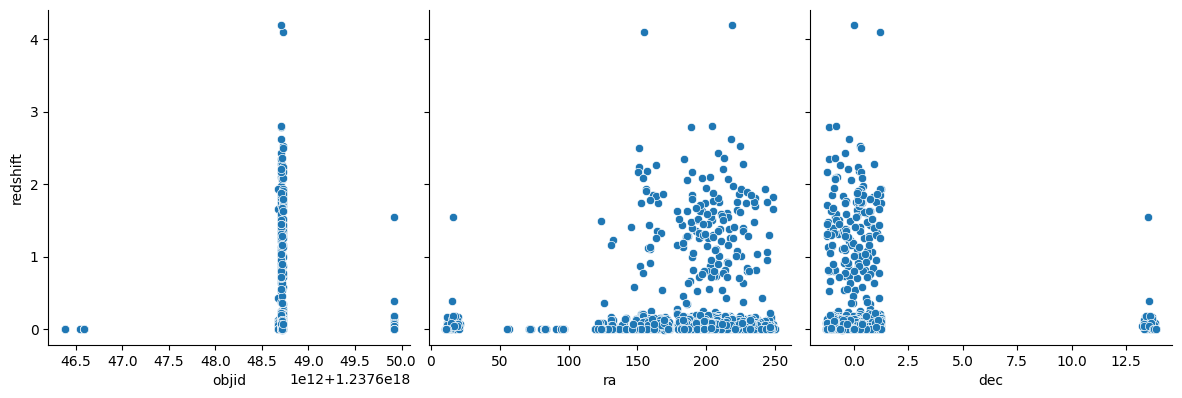

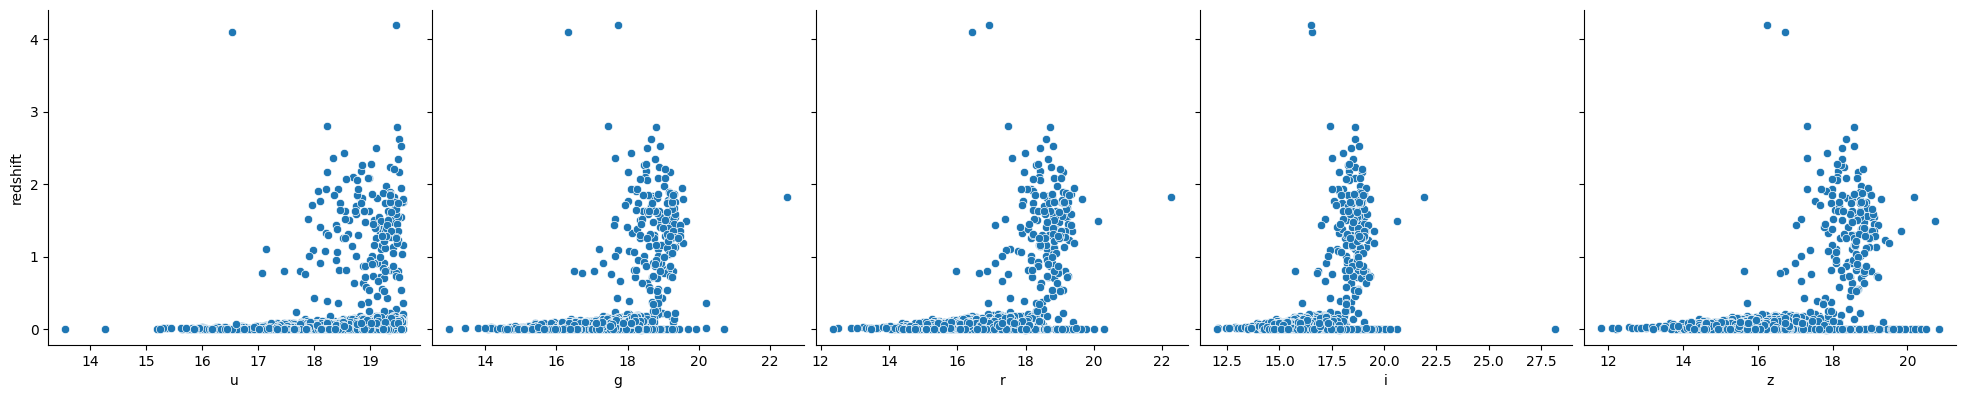

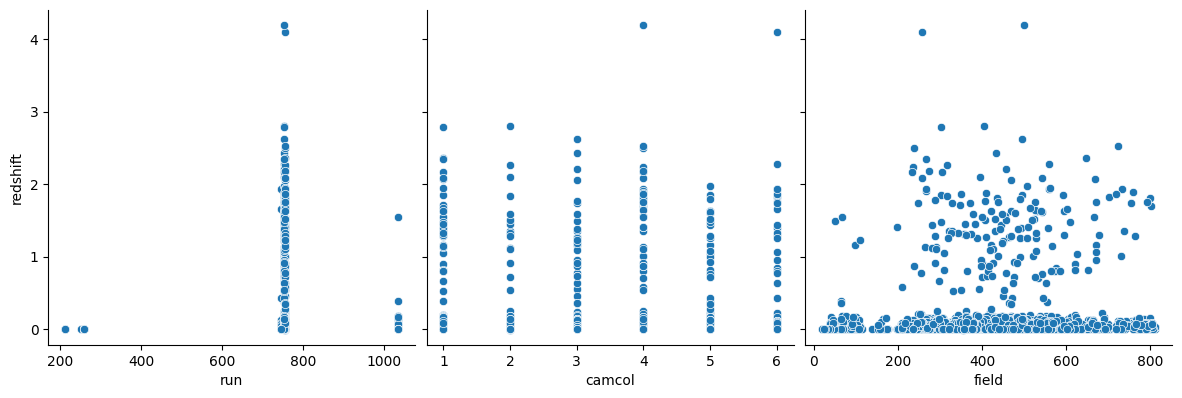

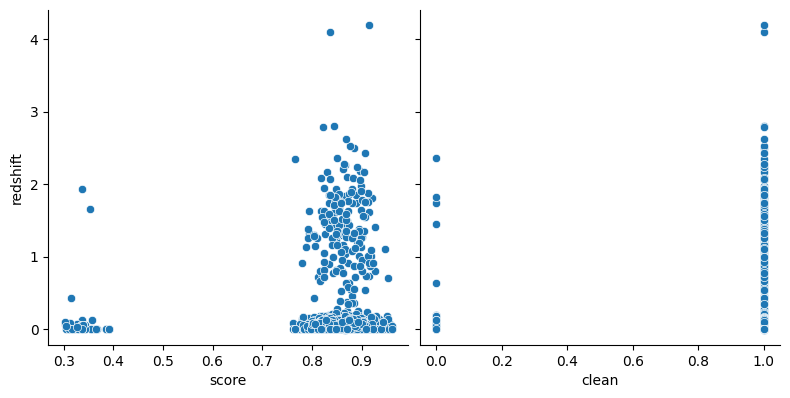

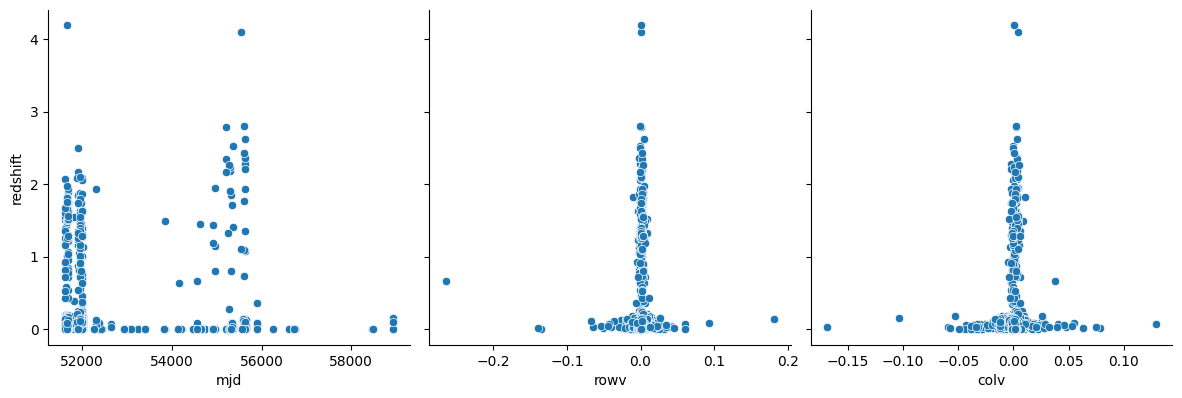

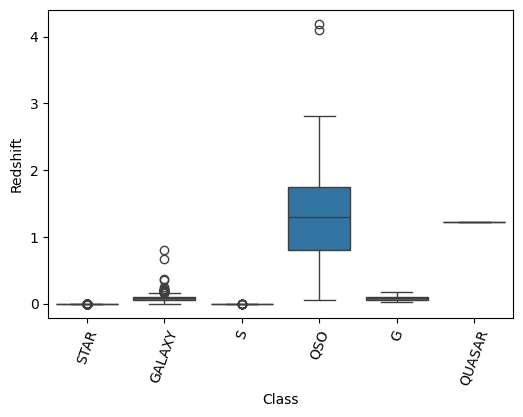

In [11]:
#Lo primero que haremos será ver la distribución de los datos para poder ir descartando algunas variables y
#ver los comportamientos de las variables en general.

star_alpes_train = pd.DataFrame(X_train, columns=X_train.columns)
star_alpes_train['redshift'] = y_train

var1=["objid", "ra", "dec"]
sns.pairplot(star_alpes_train.sample(frac=1), height=4, y_vars="redshift", x_vars=var1, kind="scatter")

var2=["u", "g", "r", "i", "z"]
sns.pairplot(star_alpes_train.sample(frac=1), height=4, y_vars="redshift", x_vars=var2, kind="scatter")

var3=["run", "camcol", "field"]
sns.pairplot(star_alpes_train.sample(frac=1), height=4, y_vars="redshift", x_vars=var3, kind="scatter")

var4=["score", "clean"]
sns.pairplot(star_alpes_train.sample(frac=1), height=4, y_vars="redshift", x_vars=var4, kind="scatter")

var5=["mjd", "rowv", "colv"]
sns.pairplot(star_alpes_train.sample(frac=1), height=4, y_vars="redshift", x_vars=var5, kind="scatter")

#Para class se utiliza un diagrama de bloques ya que es una variable categórica
fig = plt.figure(figsize=(6, 4))
ax = sns.boxplot(x = 'class', y = 'redshift', data = star_alpes_train)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.xlabel('Class')
plt.ylabel('Redshift')
plt.show()


Lo anterior nos muestra que hay variables que su distribución no afectan en nada al redshfit, entonces se podrían tener en cuenta para descartarlas posteriormente.

Algunas son el "objid", "run", "camcol", "rowv" y "colv".

Dejamos la variable "class" porque nos permitirá realizar un one hot para poder obtener una numerización de las variables categoricas, también dejamos el "clean" y "score" porque nos servirán para posteriormente realizar un filtrado y utilizar solo datos con un clean de 1, es decir confiables y con un score alto.

Ahora, las variables de "u", "g", "r", "i" y "z" son muy similares en cuanto a su distribución por lo que realizaremos un análisis de colinealidad para ver si podemos dejar todas o solo una de estas.

<Axes: >

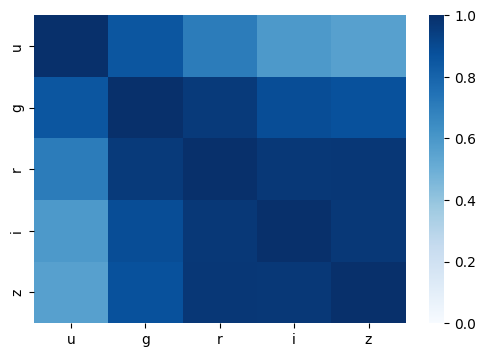

In [12]:
var = ["u", "g", "r", "i", "z"]

plt.figure(figsize=(6, 4))
sns.heatmap(star_alpes_train[var].corr(), cmap="Blues", vmin=0, vmax=1)

Lo anterior nos muestra como las cinco variables tienen una alta correlación entre si. Lo mejor entonces es descartar las siguientes cuatro variables, u, g, r y z, quedandonos solo con i ya que i hace referencia a la magnitud del infrarojo el cual nos sirve para poder realizar la predicción del redshift.

Ahora bien haremos un análisis de correlación entre las variables que utilizaremos para la regresión.

Utilizaremos entonces las siguientes variables para comprobar si hay algún tipo de correlación.



<Axes: >

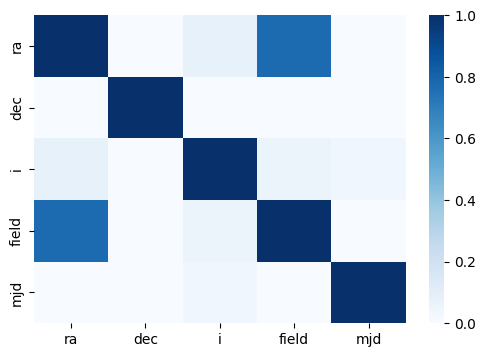

In [13]:
pos_var = ["ra", "dec", "i", "field", "mjd"]

plt.figure(figsize=(6, 4))
sns.heatmap(star_alpes_train[pos_var].corr(), cmap="Blues", vmin=0, vmax=1)

Viendo el gráfico de correlación anterior podemos ver que la mayoria de las variables seleccionadas no poseen una alta correlación, revisamos nuevamente la correlación entre la variable "ra" y "field" y decidimos ignorar la variable field y mantener la variable "ra" ya que se tiene una alta correlación entre estas dos.

<Axes: >

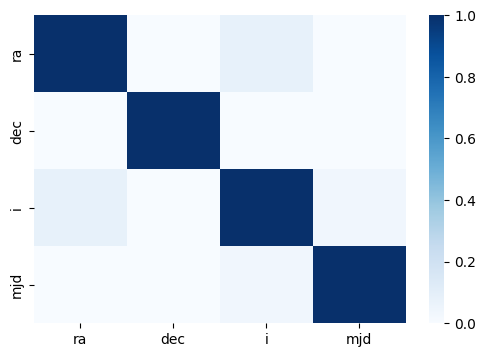

In [14]:
pos_var2 = ["ra", "dec", "i", "mjd"]

plt.figure(figsize=(6, 4))
sns.heatmap(star_alpes_train[pos_var2].corr(), cmap="Blues", vmin=0, vmax=1)

2.3. Análisis de Calidad de Datos

2.3.1. Completitud

Vamos a revisar el porcentaje de registros vacios de todas las variables

In [15]:
df_porcentajes = (100*star_alpes_train.isna().sum()/len(star_alpes_train)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
objid,0.0
ra,0.0
dec,0.0
u,0.0
g,0.0
r,0.0
i,0.0
z,0.0
run,0.0
camcol,0.0


De lo anterior vemos que todos los registros estan completos, ahora miraremos en específico las variables que queremos utilizar para la regresión:

In [16]:
star_alpes_train[["redshift"]+pos_var2].isnull().sum() / star_alpes_train.shape[0]

redshift    0.0
ra          0.0
dec         0.0
i           0.0
mjd         0.0
dtype: float64

2.3.2. Unicidad

Revisaremos ahora entonces cuales y cuantas son las filas duplicadas:

In [17]:
duplicated_rows = star_alpes_train.loc[star_alpes_train.duplicated(subset=["redshift"]+["objid"], keep=False)].sort_values("objid")
duplicated_rows


,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
3254,1237648703513428079,206.374167,-0.781673,18.28101,17.18856,16.70175,16.33173,16.14626,752,2,420,0.904768,1,GALAXY,0.088136,51943,-0.002860,0.001156
88,1237648703513428079,206.374167,-0.781673,18.28101,17.18856,16.70175,16.33173,16.14626,752,2,420,0.904768,1,GALAXY,0.088136,51943,-0.002860,0.001156
1523,1237648705679065271,247.896821,0.990909,16.74659,15.61752,15.43460,15.40196,15.40794,752,6,697,0.842783,1,STAR,0.000073,51671,0.002149,-0.000930
856,1237648705679065271,247.896821,0.990909,16.74659,15.61752,15.43460,15.40196,15.40794,752,6,697,0.842783,1,STAR,0.000073,51671,0.002149,-0.000930
629,1237648720687988788,166.623017,-0.546630,19.55528,17.73928,16.86703,16.44810,16.11761,756,2,339,0.879096,1,GALAXY,0.086721,51900,0.001004,-0.001857
2642,1237648720687988788,166.623017,-0.546630,19.55528,17.73928,16.86703,16.44810,16.11761,756,2,339,0.879096,1,GALAXY,0.086721,51900,0.001004,-0.001857
718,1237648721789780467,230.664376,0.229439,19.48961,18.21590,17.50523,17.09294,16.87079,756,4,767,0.872553,1,GALAXY,0.112827,51673,0.008122,0.012494
3933,1237648721789780467,230.664376,0.229439,19.48961,18.21590,17.50523,17.09294,16.87079,756,4,767,0.872553,1,GALAXY,0.112827,51673,0.008122,0.012494


Posteriormente de haberlas identificado, nos encargaremos de eliminar las filas duplicadas

2.3.3. Consistencia

Revisaremos la consistencia de los datos, especialmente de las variables categóricas:

In [18]:
star_alpes_train['class'].value_counts()

class
GALAXY    1286
STAR      1163
QSO        192
S          130
G           28
QUASAR       1
Name: count, dtype: int64

In [19]:
star_alpes_train.dtypes

objid         int64
ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
run           int64
camcol        int64
field         int64
score       float64
clean         int64
class        object
redshift    float64
mjd           int64
rowv        float64
colv        float64
dtype: object

2.3.4. Validez

Revisaremos que los datos esten en rangos y valores de acuerdo a lo establecido en el diccionario de datos.

Para los numéricos haremos un describe:

In [20]:
star_alpes_train.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv
count,2.800000e+03,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,1.237649e+18,185.706882,0.206136,18.595555,17.337990,16.808557,16.563584,16.405560,742.126786,3.372500,419.028214,0.850913,0.897857,0.125725,52963.977857,0.000092,-0.000163
std,4.290843e+11,40.946188,1.872847,0.850106,0.955505,1.057543,1.142566,1.190242,99.949594,1.702454,166.118781,0.073500,0.302890,0.366221,1601.129979,0.009334,0.007778
min,1.237646e+18,10.564540,-1.251920,13.551780,12.974870,12.362850,12.010790,11.799530,211.000000,1.000000,20.000000,0.301912,0.000000,-0.003322,51608.000000,-0.264516,-0.168807
25%,1.237649e+18,162.553765,-0.635942,18.145338,16.761110,16.153670,15.836365,15.586295,752.000000,2.000000,312.000000,0.836708,1.000000,0.000098,51693.000000,-0.001196,-0.001635
50%,1.237649e+18,195.503334,0.038939,18.832775,17.452585,16.821940,16.539775,16.366575,756.000000,3.000000,433.000000,0.860521,1.000000,0.028703,51985.000000,0.000365,0.000080
75%,1.237649e+18,214.218850,0.583797,19.260285,17.986520,17.490245,17.240642,17.132202,756.000000,5.000000,524.000000,0.879523,1.000000,0.085715,54468.000000,0.001700,0.001630
max,1.237650e+18,249.758313,13.854010,19.599290,22.497450,22.265960,28.179630,20.847690,1035.000000,6.000000,812.000000,0.961145,1.000000,4.192597,58932.000000,0.181871,0.128814


Para los datos que se proporcionan se tienen las siguientes conclusiones de la validez:

- ra: No tiene restricciones
- dec: No tiene restricciones
- u: Valor mayor a 0, el mínimo es 13.55
- g: Valor mayor a 0, el mínimo es 12.97
- r: Valor mayor a 0, el mínimo es 12.36
- i: Valor mayor a 0, el mínimo es 12.01
- z: Valor mayor a 0, el mínimo es 11.79
- run: No tiene restricciones
- camcol: No tiene restricciones
- field: No tiene restricciones
- score: Valor entre 0 y 1, el mínimo es 0.3 y el máximo es 0.96
- clean: Valor binario, se cumple pues solo existen valores de 0 y 1
- mjd: Dia por lo cual es positivo, se cumple
- rowv: No tiene restricciones
- colv: No tiene restricciones

Esto nos permite ver que los datos cumplen los estandares de las variables numéricas.

Ahora revisamos las variables categóricas:

In [21]:
star_alpes_train.value_counts(["class"])

class 
GALAXY    1286
STAR      1163
QSO        192
S          130
G           28
QUASAR       1
Name: count, dtype: int64

Lo anterior y de acuerdo con el diccionario de los datos nos muestra que hay errores en la clase de algunos datos, ya que las únicas clases aceptadas son: "STAR", "GALAXY" y "QSO". Esto lo solucionaremos más adelante en la preparación de los datos para el modelo.

De modo que tenemos que asignar las clases de la siguiente manera:

- S con STAR
- G con GALAXY
- QUASAR con QSO

# 3. Preparación de los Datos

3.1 Calidad de los Datos

Lo primero será eliminar las filas duplicadas:

In [64]:
def drop_dup(train):

    train.drop_duplicates(subset = 'objid', keep = 'first', inplace = True)

    duplicated_rows = train.loc[train.duplicated(subset=["redshift"]+["objid"], keep=False)].sort_values("objid")
    print(duplicated_rows)
    print(train)

    star_alpes_train = train

    return star_alpes_train

datos_pipeline = star_alpes_train
print(drop_dup(train=star_alpes_train))

Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, camcol, field, score, clean, class, redshift, mjd, rowv, colv]
Index: []
                    objid          ra       dec         u         g         r  \
1850  1237648705133609025  228.240855  0.550084  18.61315  17.45258  16.97596   
2293  1237648722836979839  170.084372  1.152687  18.98493  18.07521  17.75717   
576   1237648722306072757  183.593410  0.806727  19.07964  17.76399  17.09437   
2731  1237648705128103978  215.691773  0.607521  17.50026  16.70191  16.27915   
1051  1237648722306531342  184.627848  0.704500  18.94428  18.48217  18.59776   
...                   ...         ...       ...       ...       ...       ...   
3839  1237646586637517282   83.417598 -0.115248  19.46230  18.00237  17.44466   
1096  1237648721205199479  121.647741 -0.203825  19.18845  17.24166  16.21730   
3980  1237648722837307633  170.798233  1.120108  18.49814  16.59104  15.60435   
235   1237648675606823365  246.084939  1.174142  18.780

Ahora revisamos las clases de las filas:

In [23]:
def check_class(train):

    train.loc[train['class'].apply(lambda s: str(s).upper() == 'S'),'class'] = 'STAR'
    train.loc[train['class'].apply(lambda s: str(s).upper() == 'G'),'class'] = 'GALAXY'
    train.loc[train['class'].apply(lambda s: str(s).upper() == 'QUASAR'),'class'] = 'QSO'

    print(train['class'].value_counts())

    star_alpes_train = train

    return star_alpes_train

print(check_class(train=star_alpes_train))

print(star_alpes_train['class'].value_counts())

class
GALAXY    1311
STAR      1292
QSO        193
Name: count, dtype: int64
                    objid          ra       dec         u         g         r  \
1850  1237648705133609025  228.240855  0.550084  18.61315  17.45258  16.97596   
2293  1237648722836979839  170.084372  1.152687  18.98493  18.07521  17.75717   
576   1237648722306072757  183.593410  0.806727  19.07964  17.76399  17.09437   
2731  1237648705128103978  215.691773  0.607521  17.50026  16.70191  16.27915   
1051  1237648722306531342  184.627848  0.704500  18.94428  18.48217  18.59776   
...                   ...         ...       ...       ...       ...       ...   
3839  1237646586637517282   83.417598 -0.115248  19.46230  18.00237  17.44466   
1096  1237648721205199479  121.647741 -0.203825  19.18845  17.24166  16.21730   
3980  1237648722837307633  170.798233  1.120108  18.49814  16.59104  15.60435   
235   1237648675606823365  246.084939  1.174142  18.78055  17.26691  16.68871   
1061  1237648722304696440  180.4

Ahora generaremos el One Hot Encoder para la variable "class".

In [24]:
def OHE_class(train):

    clases = np.array([['STAR'], ['GALAXY'], ['QSO']])

    df = train

    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    star_encoded = encoder.fit_transform(df[['class']])

    nom_col = encoder.get_feature_names_out(['class'])
    df_encoded = pd.DataFrame(star_encoded, columns=nom_col)

    star_alpes_train = pd.concat([df.drop(columns=['class']).reset_index(), df_encoded.reset_index()], axis = 1)

    star_alpes_t = star_alpes_train.copy()

    return star_alpes_t

print(OHE_class(train=star_alpes_train))

star_alpes_t = OHE_class(train=star_alpes_train)



      index                objid          ra       dec         u         g  \
0      1850  1237648705133609025  228.240855  0.550084  18.61315  17.45258   
1      2293  1237648722836979839  170.084372  1.152687  18.98493  18.07521   
2       576  1237648722306072757  183.593410  0.806727  19.07964  17.76399   
3      2731  1237648705128103978  215.691773  0.607521  17.50026  16.70191   
4      1051  1237648722306531342  184.627848  0.704500  18.94428  18.48217   
...     ...                  ...         ...       ...       ...       ...   
2791   3839  1237646586637517282   83.417598 -0.115248  19.46230  18.00237   
2792   1096  1237648721205199479  121.647741 -0.203825  19.18845  17.24166   
2793   3980  1237648722837307633  170.798233  1.120108  18.49814  16.59104   
2794    235  1237648675606823365  246.084939  1.174142  18.78055  17.26691   
2795   1061  1237648722304696440  180.450954  0.693904  19.40882  17.95349   

             r         i         z  run  ...     score  clean  

Ahora realizaremos un filtrado y eliminaremos las filas cuyos valores en clean sean de 0, es decir que sean lecturas sucias y podrían afectar el modelo.
Además, vamos a quitar las filas cuyos valores de score sean inferiores al 50% para poder tener una mayor precisión.

In [25]:
def filter_clean_score(train):

    train = train[train['clean'] == 1]
    train = train[train['score'] >= 0.50]

    star_alpes_train = train

    return star_alpes_train

print(filter_clean_score(train=star_alpes_t))

      index                objid          ra       dec         u         g  \
0      1850  1237648705133609025  228.240855  0.550084  18.61315  17.45258   
1      2293  1237648722836979839  170.084372  1.152687  18.98493  18.07521   
2       576  1237648722306072757  183.593410  0.806727  19.07964  17.76399   
3      2731  1237648705128103978  215.691773  0.607521  17.50026  16.70191   
4      1051  1237648722306531342  184.627848  0.704500  18.94428  18.48217   
...     ...                  ...         ...       ...       ...       ...   
2790    905  1237648705135509892  232.565224  0.519655  19.57235  18.18137   
2791   3839  1237646586637517282   83.417598 -0.115248  19.46230  18.00237   
2792   1096  1237648721205199479  121.647741 -0.203825  19.18845  17.24166   
2793   3980  1237648722837307633  170.798233  1.120108  18.49814  16.59104   
2795   1061  1237648722304696440  180.450954  0.693904  19.40882  17.95349   

             r         i         z  run  ...     score  clean  

In [26]:
star_alpes_t.sample(5)

,index,objid,ra,dec,u,g,r,i,z,run,...,score,clean,redshift,mjd,rowv,colv,index,class_GALAXY,class_QSO,class_STAR
2618,2537,1237648722310332424,193.331823,0.755857,19.06658,18.87753,18.76509,18.54024,18.52854,756,...,0.868674,1,1.508673,51609,0.002201,-0.000296,2618,0.0,1.0,0.0
1494,3651,1237648703515131953,210.347952,-0.684411,18.89517,17.71790,17.67826,17.70537,17.75982,752,...,0.882381,1,0.000307,51942,0.000583,0.002041,1494,0.0,0.0,1.0
104,2841,1237648704051151042,208.438117,-0.320588,19.55648,18.63135,18.32463,18.21928,18.18018,752,...,0.906846,1,-0.000111,55605,0.001472,0.000393,104,0.0,0.0,1.0
1925,3795,1237648720685891588,161.725704,-0.628290,19.15100,17.45303,16.78522,16.56231,16.45795,756,...,0.860986,1,0.000051,54208,0.001300,-0.002063,1925,0.0,0.0,1.0
2037,651,1237648721759436876,161.340818,0.375361,18.33334,17.28500,16.87353,16.71710,16.65660,756,...,0.871447,1,0.001101,54208,0.000085,-0.002074,2037,0.0,0.0,1.0


Nos decicimos de la columna class y en su lugar hicimos 3 columnas binarias dependiendo de la clase donde se clasificaron los elementos.

También hicimos un filtrado y nos quedamos con los elementos que tienen un score mayor a 50% (0.5) y un clean de 1.


In [27]:
X_train = star_alpes_t.drop(columns=['redshift'])
y_train = star_alpes_t['redshift']

X_train.sample(5)

,index,objid,ra,dec,u,g,r,i,z,run,...,field,score,clean,mjd,rowv,colv,index,class_GALAXY,class_QSO,class_STAR
1357,3747,1237648703517032578,214.646660,-0.682624,19.04738,17.27611,16.22921,15.76583,15.47639,752,...,475,0.823312,1,51609,-0.009250,-0.006470,1357,1.0,0.0,0.0
1126,3755,1237648721233182799,185.658380,-0.097363,17.17236,15.74072,15.22167,15.04700,14.98478,756,...,466,0.874151,1,54140,-0.001294,-0.001268,1126,0.0,0.0,1.0
629,1611,1237648721232593089,184.286319,-0.026652,18.75855,17.41245,16.75101,16.36639,16.11426,756,...,457,0.888804,1,52023,0.003737,0.009849,629,1.0,0.0,0.0
2552,3629,1237648720685694987,161.291107,-0.580470,18.86026,17.27780,16.66154,16.42111,16.29518,756,...,304,0.860675,1,54213,-0.001240,-0.001190,2552,0.0,0.0,1.0
2026,1313,1237648704588349647,209.085881,0.105875,19.48797,17.88923,17.01585,16.62569,16.28345,752,...,438,0.913456,1,51942,-0.000859,-0.004479,2026,1.0,0.0,0.0


In [74]:
#Definimos las variables de la regresión a utilizar
def var_reg(x_train):
    if 'redshift' in x_train.columns:
       x_train = x_train.drop(columns=['redshift'])
    variables_reg = ["ra", "dec", "i", "mjd", "class_GALAXY", "class_QSO", "class_STAR"]
    x_train = x_train.drop(columns=[column for column in X_train.columns if column not in variables_reg])
    print("aeaeaeaooooooooooooo")
    x_train.sample(5)
    return x_train


X_train = var_reg(X_train)

X_train.sample(5)


aeaeaeaooooooooooooo


,ra,dec,i,mjd,class_GALAXY,class_QSO,class_STAR
1173,200.296250,-0.666406,15.82630,51959,1.0,0.0,0.0
2242,148.146365,0.249044,16.44283,51608,1.0,0.0,0.0
880,233.089527,0.505977,15.60002,51989,1.0,0.0,0.0
346,165.591716,-0.474609,15.97491,51908,1.0,0.0,0.0
430,149.412644,0.332573,16.26086,51633,1.0,0.0,0.0


# 4. Modelado

Realizaremos entonces el proceso de modelado de los datos de train

In [29]:
regresion = LinearRegression()

regresion.fit(X_train, y_train)

LinearRegression()

La regresión se realiza con éxito y a continuación revisaremos sus coeficientes, el intercepto y las métricas de calidad.

In [30]:
pd.DataFrame({"columns":variables_reg, "coeficientes":regresion.coef_})

,columns,coeficientes
0,ra,-0.000045
1,dec,-0.004709
2,i,0.014539
3,mjd,0.000016
4,class_GALAXY,-0.346234
5,class_QSO,0.812253
6,class_STAR,-0.466019


In [31]:
regresion.intercept_

np.float64(-0.6241075867874826)

Vamos a graficar nuestra regresión en comparación a las Variables que utilizamos:

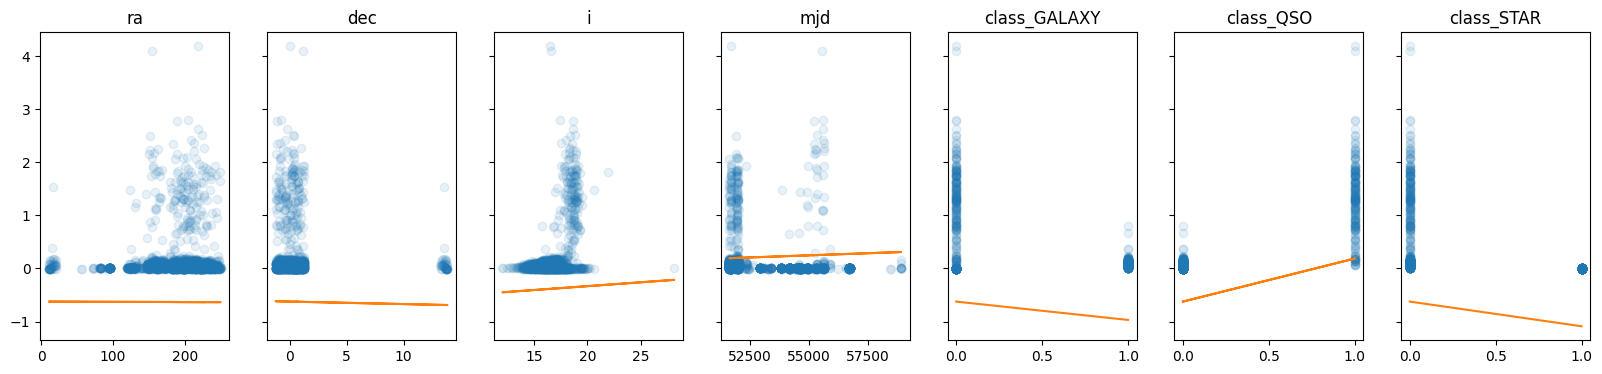

In [32]:
f, axs = plt.subplots(1, len(variables_reg), sharey=True, figsize=(20, 4))

for i in range(len(variables_reg)):
    col = variables_reg[i]
    x = X_train[col]
    m = regresion.coef_[i]
    b = regresion.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

In [33]:
def transform_test(X_test, y_test):

    star_alpes_test = pd.concat([X_test, y_test], axis=1)

    star_nd = drop_dup(star_alpes_test)
    star_change_c = check_class(star_nd)
    star_OHE = OHE_class(star_change_c)
    star_test = filter_clean_score(star_OHE)

    return star_test

star_a_test = transform_test(X_test, y_test) 

star_a_test.sample(5)


Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, camcol, field, score, clean, class, redshift, mjd, rowv, colv, redshift]
Index: []
                    objid          ra       dec         u         g         r  \
200   1237648704585924828  203.588211  0.091085  19.22516  17.97956  17.16069   
1078  1237648721787355209  225.096864  0.254953  18.55557  16.89302  16.18807   
610   1237648722836848747  169.665357  1.093317  19.53530  17.79287  16.87753   
2159  1237648720164814988  197.847485 -0.962157  18.50276  17.43575  17.04051   
1169  1237648722306400454  184.460148  0.802038  18.86882  17.75835  17.25910   
...                   ...         ...       ...       ...       ...       ...   
549   1237648704590643362  214.342391  0.023698  17.20059  15.45608  14.60244   
2651  1237648705131839810  224.231446  0.555797  19.46866  18.26626  17.80767   
1535  1237648722836783266  169.623405  1.098641  18.89477  17.09377  16.15349   
218   1237648705669496960  226.089043  0.9867

,index,objid,ra,dec,u,g,r,i,z,run,...,clean,redshift,mjd,rowv,colv,redshift,index,class_GALAXY,class_QSO,class_STAR
1185,1737,1237648720686547139,163.336503,-0.606386,17.14680,15.91065,15.46300,15.20340,15.03239,756,...,1,0.018496,51909,-0.022618,0.013424,0.018496,1185,1.0,0.0,0.0
314,3789,1237648720165404820,199.172524,-0.858658,19.21985,17.48280,16.61537,16.16807,15.82089,756,...,1,0.083381,51985,-0.000518,-0.005436,0.083381,314,1.0,0.0,0.0
420,40,1237648720166322390,201.345084,-1.005007,18.54905,17.13341,16.37300,15.94250,15.65469,756,...,1,0.086031,51959,-0.002133,0.007354,0.086031,420,1.0,0.0,0.0
714,808,1237648722304434271,179.877675,0.647705,19.18100,17.77770,17.08691,16.71522,16.48646,756,...,1,0.085543,51930,0.000816,0.001450,0.085543,714,1.0,0.0,0.0
742,1813,1237648704052723785,212.045865,-0.273361,17.72441,16.83494,16.49445,16.36187,16.31086,752,...,1,0.000395,51615,-0.001051,0.003008,0.000395,742,0.0,0.0,1.0


In [34]:
X_test = star_a_test.drop(columns=['redshift'])
y_test = star_a_test['redshift']

variables_reg = ["ra", "dec", "i", "mjd", "class_GALAXY", "class_QSO", "class_STAR"]

X_test = X_test.drop(columns=[column for column in X_test.columns if column not in variables_reg])
y_test = y_test.T.drop_duplicates().T

X_test.sample(5)



,ra,dec,i,mjd,class_GALAXY,class_QSO,class_STAR
338,237.152584,-0.416118,16.91109,51691,0.0,0.0,1.0
994,209.214574,-0.331383,16.36091,51942,1.0,0.0,0.0
1054,202.668367,-0.356466,17.29631,51959,1.0,0.0,0.0
406,235.884928,0.276712,18.59585,51663,0.0,1.0,0.0
1189,237.403096,0.256853,17.62801,51691,0.0,0.0,1.0


4.1 Mean Absolute Error

In [35]:
print("MAE Test:", mean_absolute_error(y_test, regresion.predict(X_test)))

MAE Test: 0.074991466345177


4.2 Root Mean Squeared Error

In [36]:
print("RMSE Test:", np.sqrt(mean_absolute_error(y_test, regresion.predict(X_test))))

RMSE Test: 0.2738456980585545


4.3 R^2

In [37]:
print("R2 Test:", r2_score(y_test, regresion.predict(X_test)))

R2 Test: 0.7793957768656656


# 5. Validación

In [38]:
data_validation = "./data/202510_Laboratorio 1 - Regresión_validation_data.csv"

validation = pd.read_csv(data_validation, sep=",", encoding="ISO-8859-1")

validation_data = validation.copy()

validation_data.shape

(1000, 17)

In [39]:
validation_data['redshift'] = 0

validation_nd = drop_dup(train=validation_data)
validation_change_c = check_class(validation_nd)
validation_OHE = OHE_class(validation_change_c)
validation_test = filter_clean_score(validation_OHE)

validation_test = validation_test.drop(columns=['redshift'])

variables_reg = ["ra", "dec", "i", "mjd", "class_GALAXY", "class_QSO", "class_STAR"]

val_test = validation_test.drop(columns=[column for column in validation_test.columns if column not in variables_reg])

val_test.sample(5)

Empty DataFrame
Columns: [ra, colv, i, rowv, class, dec, score, camcol, field, clean, r, z, g, run, objid, u, mjd, redshift]
Index: []
             ra      colv         i      rowv   class       dec     score  \
0    190.129408  0.000187  17.04507  0.000731    STAR  0.740488  0.822898   
1    126.739160 -0.001844  17.87246 -0.000979    STAR -0.982894  0.868712   
2    162.692083 -0.004810  16.20404 -0.004358  GALAXY  1.068587  0.830950   
3    190.181702 -0.012342  17.48020 -0.002584  GALAXY  0.797830  0.833386   
4    225.414989 -0.000250  17.81908 -0.000397    STAR  0.878768  0.881142   
..          ...       ...       ...       ...     ...       ...       ...   
995  229.490772 -0.000204  15.64112 -0.001221  GALAXY  0.472690  0.888303   
996  158.537832  0.000757  15.34729 -0.006414  GALAXY -0.429801  0.874846   
997  203.858357 -0.004926  16.54798  0.001629  GALAXY  0.132696  0.881403   
998  199.700795  0.000579  17.74216 -0.001224    STAR -0.904717  0.840030   
999  199.892980  0

,ra,i,dec,mjd,class_GALAXY,class_QSO,class_STAR
486,11.817381,17.93469,13.725012,54746,0.0,0.0,1.0
634,16.282782,15.97733,13.542339,51811,1.0,0.0,0.0
866,172.693652,17.59461,-0.625297,54471,1.0,0.0,0.0
354,95.739986,15.71746,0.861880,52931,0.0,0.0,1.0
642,185.546646,15.58817,-0.145713,51990,1.0,0.0,0.0


In [40]:
val_test = val_test[X_train.columns]
y_pred = regresion.predict(val_test)

val_test['redshift'] = y_pred

val_test.sample(5)

,ra,dec,i,mjd,class_GALAXY,class_QSO,class_STAR,redshift
684,206.140352,0.164908,16.27223,51671,1.0,0.0,0.0,0.075687
100,160.771075,0.358644,16.75842,54213,0.0,0.0,1.0,0.004414
966,161.478244,1.068275,17.38296,51910,1.0,0.0,0.0,0.093381
832,169.897521,-0.528065,15.61557,51984,0.0,0.0,1.0,-0.043788
387,234.658980,-0.458800,17.49768,52413,0.0,0.0,1.0,-0.012858


# 6 Futuros Datos
No siempre vamos a querer hacer los pasos uno por uno para la preparación de nuevos datos para nuestro modelo. Es por esto que crearemos un pipeline que contenga todos los pasos en la preparación de los datos para que estos sean insertados en nuestro modelo y así tener una escalabilidad amplia.

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin



class drop_dup1(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # No hace nada en fit

    def transform(self, X):
        return drop_dup(X)  # Aplica la transformación
    



class check_class1(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # No hace nada en fit

    def transform(self, X):
        return check_class(X)  # Aplica la transformación
    
class OHE_class1(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # No hace nada en fit

    def transform(self, X):
        return OHE_class(X)  # Aplica la transformación
    
class filter_clean_score1(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # No hace nada en fit

    def transform(self, X):
        return filter_clean_score(X)  # Aplica la transformación
    

class var_reg1(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # No hace nada en fit

    def transform(self, X):
        return var_reg(X)  # Aplica la transformación
    

pipeline = Pipeline([
    ('Quitar duplicados', drop_dup1()),
    ('Revisar las clases de las filas',check_class1()),
    ('Generar el One Hot encoder',OHE_class1()),
    ('Filtrado por valores', filter_clean_score1() ),
    ('Quitar todas las variables que no se usarán en la regresión', var_reg1())
    
    
])

datos_refinados = pipeline.fit_transform(datos_pipeline)

datos_pipeline.sample(5)
datos_refinados.sample(5)

Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, camcol, field, score, clean, class, redshift, mjd, rowv, colv]
Index: []
                    objid          ra       dec         u         g         r  \
1850  1237648705133609025  228.240855  0.550084  18.61315  17.45258  16.97596   
2293  1237648722836979839  170.084372  1.152687  18.98493  18.07521  17.75717   
576   1237648722306072757  183.593410  0.806727  19.07964  17.76399  17.09437   
2731  1237648705128103978  215.691773  0.607521  17.50026  16.70191  16.27915   
1051  1237648722306531342  184.627848  0.704500  18.94428  18.48217  18.59776   
...                   ...         ...       ...       ...       ...       ...   
3839  1237646586637517282   83.417598 -0.115248  19.46230  18.00237  17.44466   
1096  1237648721205199479  121.647741 -0.203825  19.18845  17.24166  16.21730   
3980  1237648722837307633  170.798233  1.120108  18.49814  16.59104  15.60435   
235   1237648675606823365  246.084939  1.174142  18.780

,index,objid,ra,dec,u,g,r,i,z,run,...,field,score,clean,mjd,rowv,colv,index,class_GALAXY,class_QSO,class_STAR
2442,3347,1237648720132178180,123.327886,-0.865371,18.21842,15.53100,14.54983,14.21792,14.01519,756,...,50,0.851417,1,53816,-0.000271,-0.001635,2442,0.0,0.0,1.0
2784,129,1237648721231544570,181.891255,-0.206792,18.73827,17.50108,16.85823,16.49805,16.24433,756,...,441,0.870565,1,51999,0.006784,0.003912,2784,1.0,0.0,0.0
2009,247,1237648720684712091,159.057514,-0.584071,19.53399,17.58451,16.58664,16.12435,15.76249,756,...,289,0.869011,1,51957,-0.002412,-0.002009,2009,1.0,0.0,0.0
611,3330,1237648705133216079,227.378648,0.513283,18.73026,17.37945,16.62684,16.22299,15.92939,752,...,560,0.896691,1,51665,0.003921,0.000670,611,1.0,0.0,0.0
294,954,1237648721759240260,160.911986,0.332500,19.40814,18.13501,17.62594,17.43318,17.33969,756,...,301,0.908089,1,54213,0.001068,0.002959,294,0.0,0.0,1.0
